# Machine learning from scratch: K Nearest Neighbor (KNN)

## Introduction

In this notebook we investigate the K Nearest Neighbor (KNN) algorithm. This is a classification algorithm, and it can be easily implmented since it is one of the simplest Machine Learning algorithms. It supports multiclass classification, and this does not require a transformation to binary classification. To keep the implementation simple, we will focus on the binary classification case. This algorithm can be used for regression, which we will investigate in future notebooks.

## The model

Suppose our dataset consists of points $\{ x^{(1)},\dots,x^{(m)}\}$ with binary labels $\{y^{(1)},\dots,y^{(m)} \}$. Our goals is, given a new point $z$, predict which class it belongs to. In order to do this, we will look at the $k$ nearest points of our dataset and assign to $z$ the class with more points in the set of $k$ nearest neighbors of $z$. Thus, the algorithm does not have parameters to learn and perform the prediction with, but instead uses the whole dataset every time we want to predict the label for a new example. We summarize the algorithm as follows:

\begin{align*}
&  \  \text{Let } z \text{ be a new point} \\
&  \ \text{for } i = 1\dots \text{ num examples}  \\
&  \qquad \ d[i] = \text{ distance from } z \text{ to } x^{(i)}  \\
&  \ \text{Get the } k \text{ indices } i_1,\dots i_k \text{ for which } d[i] \text{ is smaller}  \\
&  \ \text{Compute the average } A = (y^{(i_1)}+\dots + y^{(i_k)})/k  \\
&  \ \text{If } A > 0.5:  \\
&  \qquad \text{return } 1  \\
&  \ \text{Else }:  \\
&  \qquad \text{return } 0  \\
\end{align*}

### Remarks: 
- The choice of a distance function for this algorithm can be adapted to the nature of the problem. Some other choices for this can be the $L^{1}$ distance as well as the [hamming distance](https://en.wikipedia.org/wiki/Hamming_distance).
- The way we compute the average $A$ can also be modified accordingly. For instance, weights can be added to the model, increasing its complexity.
- 


We proceed to implement the algorithm. We start by generating two clouds of points following multivariate normal distributions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

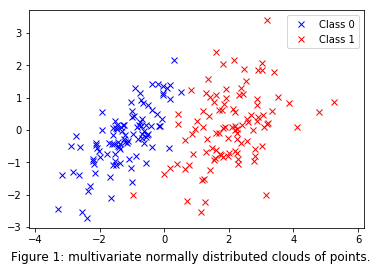

In [2]:
np.random.seed(1)
num_observations = 100
x0 = np.random.multivariate_normal([-1, 0], [[1, .75],[.75, 1]], num_observations)
x1 = np.random.multivariate_normal([2, 0], [[1, .35],[.35, 1]], num_observations)

y0 = np.zeros(len(x0))
y1 = np.ones(len(x1))

X =  np.vstack((x0,x1))
Y = np.append(y0,y1)

#fig,ax = plt.subplots()
plt.plot(x0[:,0],x0[:,1],'x',color='blue')   #blue = class 0
plt.plot(x1[:,0],x1[:,1],'x',color='red')    #red = class 1 
plt.axis('equal')
plt.legend(['Class 0','Class 1'])
plt.figtext(0.5, 0.01, 'Figure 1: multivariate normally distributed clouds of points.', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [3]:
def knn(X,Y,k,z): #z is a new point that we want to predict its class
    D = np.hstack([X,Y.reshape(-1,1)]) #Put both the features and the labels in one matrix
    D += -np.array([np.hstack([z,[0]])]*len(X)) #Compute the difference between the new point and each of our examples
    W = np.sum(D[:,0:2]**2,axis=1).reshape(-1,1) #Compute the norm of the difference
    W = np.hstack([W,D[:,2].reshape(-1,1)]) #Append the column with the labels
    W = W[W[:,0].argsort()] #Sort the values increasingly
    if np.sum(W[0:k,1])/k > 0.5:
        return 1
    else:
        return 0

We can use this function to predict the class of a new point. We set $k=5$ for this example. The point of coordinates $[3,0]$ is expected to belong to the red class:

In [4]:
knn(X,Y,5,[0,1])

0

We can in fact, plot the decision boundary and color the regions with the predicted class.

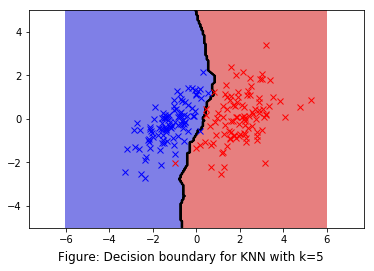

In [5]:
def decision_boundary(k):
    x_grid = np.linspace(-6, 6, 200)
    y_grid = np.linspace(-5, 5, 200)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    z = np.zeros(X_grid.shape)
    Z = np.array(z)
    for i in range(Z.shape[1]):
        for j in range(Z.shape[0]):
            Z[i,j] = knn(X,Y,k,[x_grid[j],y_grid[i]])
    plt.plot(x0[:,0],x0[:,1],'x',color='blue')   #blue = class 0
    plt.plot(x1[:,0],x1[:,1],'x',color='red')    #red = class 1 
    plt.contourf(X_grid, Y_grid, Z, alpha=.5, cmap='jet')
    C = plt.contour(X_grid, Y_grid, Z,  colors='black')

    plt.axis('equal')
    plt.figtext(0.5, 0.01, 'Figure: Decision boundary for KNN with k='+str(k), 
                wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
decision_boundary(5)

It is worth mentioning that the choice of $k$ can determine if the model overfits or underfits the data. We plot the decision boundaries for the values of $k=1,5,10$.

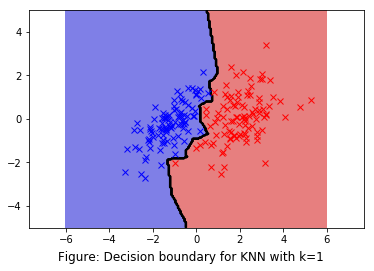

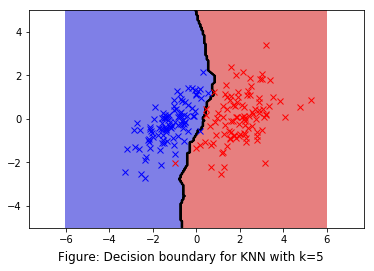

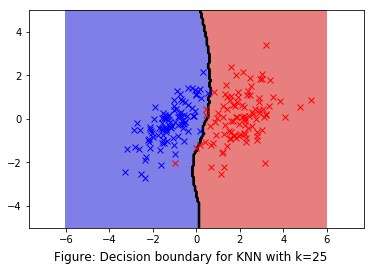

In [6]:
decision_boundary(1)
decision_boundary(5)
decision_boundary(25)

We can see that for smaller values of $k$ the algorithm tends to overfit the data, and hence it might not yield good predictions. On the other hand, larger values of $k$ makes the decision boundary more rigid and less sensitive to the variance of the data. Tuning the hyperparameters of the model is necessary. Cross validations methods are some of the most usual methods used to tune the parameters of the model.

We finish this notebook by pointing out that the performance of this algorithm can be improved by scaling the data. We also point out that our implementation of the algorithm is the simplest possible, as it is not optimized to manage large datasets. In this case, comparing the distance of the new point to each dataset can be computationally expensive, and some [locality-sensitive hashing](https://en.wikipedia.org/wiki/Locality-sensitive_hashing) method to find the nearest neighbors or organizing the data in a more efficient way, such as using [k-d trees](https://en.wikipedia.org/wiki/K-d_tree). Finally, we remark that KNN can be sensitive to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), as in higher dimensional spaces, the measure of the unit ball becomes a smaller fraction of the measure of the unit cube. This implies that the complement of the unit ball relative to the unit cube represents the largest fraction of the space. Thus, if we have a set of random points uniformly distributed in the unit cube, a very small fraction of them will belong to the unit ball in a higher dimensional space. A very insightful discusion about this topic can be found [here](https://stats.stackexchange.com/questions/99171/why-is-euclidean-distance-not-a-good-metric-in-high-dimensions/99191#99191).